<a href="https://colab.research.google.com/github/pcsilcan/aed/blob/master/20202/aed_20202_112_bst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%writefile bst.h
#pragma once

#include <functional>
#include <string>
#include <fstream>

using namespace std;

template <typename T, typename R=T>
class Bst {
    struct Node {
        T       elem;
        Node*   left;
        Node*   right;

        Node(T elem, Node* left=nullptr, Node* right=nullptr)
            : elem(elem), left(left), right(right) {}
    };

    using lmbKey    = function<R(T)>;
    using lmbP      = function<void(T)>;

    Node*   root;
    int     len;
    lmbKey  key;
public:
    Bst(lmbKey key=[](T a) {return a;}) : root(nullptr), len(0), key(key) {}
    ~Bst()                      { destroy(root); }

    void add(T elem)            { add(root, elem); }
    void inOrder(lmbP proc)     { inOrder(root, proc); }

    T find(R attr) {
        auto node = find(root, attr);
        return node == nullptr? nullptr: node->elem;
    }
    T greatest() {
        if (root == nullptr) {
            return nullptr;
        } else {
            auto node = greatest(root);
            return node->elem;
        }
    }
    void remove(R attr) {
        auto node = find(root, attr);
        if (node == nullptr) return;
        if (node->left == nullptr) {
            Node* aux = node;
            node = node->right;
            delete aux;
        } else {
            auto cand = greatest(node->left);
            node->elem = cand->elem;
            Node* aux = cand;
            cand = cand->left;
            delete aux;
        }
    }

//-------------------------------------------------------------------
// CÓDIGO SUPER OPCIONAL (NO ES NECESARIO ENTENDER NI USAR SI NO DESEA)
//-------------------------------------------------------------------
    void generateDot(std::string filename) {
        if (root != nullptr) {
            std::ofstream file(filename);
            file << "digraph G {\n";
            generate(root, file);
            file << "}";
        }
    }

    void generate(Node* node, std::ofstream& file) {
        if (node->left != nullptr) {
            file << node->elem << "->" << node->left->elem << std::endl;
            generate(node->left, file);
        } else {
            file << "l" << node->elem << " [shape=point]\n";
            file << node->elem << "->l" << node->elem << std::endl;
        }
        if (node->right != nullptr) {
            file << node->elem << "->" << node->right->elem << std::endl;
            generate(node->right, file);
        } else {
            file << "r" << node->elem << " [shape=point]\n";
            file << node->elem << "->r" << node->elem << std::endl;
        }
    }
//-------------------------------------------------------------------
// (end) CÓDIGO SUPER OPCIONAL (NO ES NECESARIO ENTENDER NI USAR SI NO DESEA)
//-------------------------------------------------------------------

private:
    void destroy(Node* node) {
        if (node != nullptr) {
            destroy(node->left);
            destroy(node->right);
            delete node;
        }
    }
    void add(Node*& node, T elem) {
        if (node == nullptr) {
            node = new Node(elem);
            ++len;
        } else if (key(elem) < key(node->elem)) {
            add(node->left, elem);
        } else if (key(elem) > key(node->elem)) {
            add(node->right, elem);
        }
    }
    void inOrder(Node* node, lmbP proc) {
        if (node != nullptr) {
            inOrder(node->left, proc);
            proc(node->elem);
            inOrder(node->right, proc);
        }
    }
    Node*& find(Node*& node, R attr) {
        if (node == nullptr) {
            return dummynull;
        } else if (attr == key(node->elem)) {
            return node;
        } else if (attr < key(node->elem)) {
            return find(node->left, attr);
        } else {
            return find(node->right, attr);
        }
        // return find((attr < key(node->elem)? node->left: node->right, attr);
    }
    Node*& greatest(Node*& node) {
        return node->right == nullptr? node: greatest(node->right);
    }

    // Mandrakeada
    Node* dummynull = nullptr;
};

Overwriting bst.h


In [2]:
%%writefile 1.cpp
#include <iostream>
#include <string>
#include <stdlib.h>
#include "bst.h"

using namespace std;


int main() {
    Bst<int>* bst = new Bst<int>();

    srand(1981);
    for (int i = 0; i < 20; ++i) {
        bst->add(rand() % 100);
    }

    bst->inOrder([](int x) { cout << x << " "; });
    cout << endl;

    bst->generateDot("1.dot");

    return 0;
}

Writing 1.cpp


In [3]:
!g++ -std=c++17 -O2 -Wall 1.cpp && ./a.out

0 8 9 16 18 33 36 37 40 51 54 56 62 64 65 68 76 91 93 95 


In [4]:
!cat 1.dot

digraph G {
16->0
l0 [shape=point]
0->l0
0->8
l8 [shape=point]
8->l8
8->9
l9 [shape=point]
9->l9
r9 [shape=point]
9->r9
16->33
33->18
l18 [shape=point]
18->l18
r18 [shape=point]
18->r18
33->37
37->36
l36 [shape=point]
36->l36
r36 [shape=point]
36->r36
37->56
56->51
51->40
l40 [shape=point]
40->l40
r40 [shape=point]
40->r40
51->54
l54 [shape=point]
54->l54
r54 [shape=point]
54->r54
56->91
91->62
l62 [shape=point]
62->l62
62->65
65->64
l64 [shape=point]
64->l64
r64 [shape=point]
64->r64
65->76
76->68
l68 [shape=point]
68->l68
r68 [shape=point]
68->r68
r76 [shape=point]
76->r76
91->93
l93 [shape=point]
93->l93
93->95
l95 [shape=point]
95->l95
r95 [shape=point]
95->r95
}

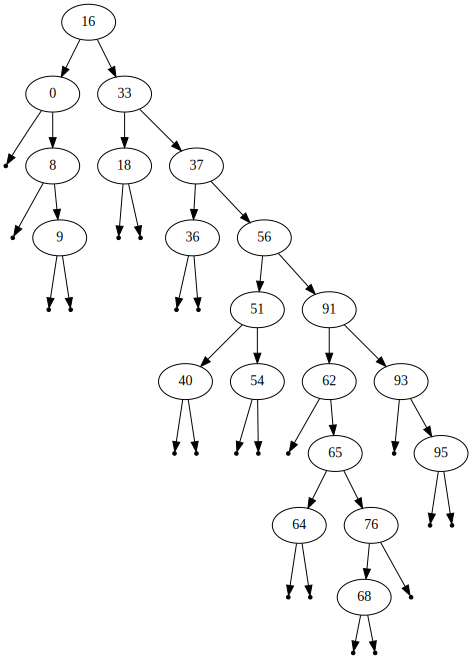

In [5]:
import graphviz as gv
gv.Source.from_file("1.dot")

In [6]:
%%writefile persona.h
#ifndef __PERSONA_H__
#define __PERSONA_H__

#include <string>

using std::string;

class Persona {
    string  dni;
    string  apaterno;
    string  amaterno;
    string  nombres;
    string  fecnac;
    float   estatura;
public:
    Persona(string  dni="",
            string  apaterno="",
            string  amaterno="",
            string  nombres="",
            string  fecnac="",
            float   estatura=.0f) : dni(dni),
                                    apaterno(apaterno),
                                    amaterno(amaterno),
                                    nombres(nombres),
                                    fecnac(fecnac),
                                    estatura(estatura) {}
               
    string  getDni()        { return dni; }
    string  getApaterno()   { return apaterno; }
    string  getAmaterno()   { return amaterno; }
    string  getNombres()    { return nombres; }
    string  getFecnac()     { return fecnac; }
    float   getEstatura()   { return estatura; }
    
    void    setDni(string dni)              { this->dni         =  dni; }
    void    setApaterno(string apaterno)    { this->apaterno    =  apaterno; }
    void    setAmaterno(string amaterno)    { this->amaterno    =  amaterno; }
    void    setNombres(string nombres)      { this->nombres     =  nombres; }
    void    setFecnac(string fecnac)        { this->fecnac      =  fecnac; }
    void    setEstatura(float estatura)     { this->estatura    =  estatura; }
};

#endif

Overwriting persona.h


In [12]:
%%writefile 2.cpp
#include <iostream>
#include <iomanip>
#include <fstream>
#include <string>
#include <sstream>
#include <vector>
#include <stdlib.h>
#include "persona.h"
#include "bst.h"

using namespace std;

void loadData(vector<string>& vec, string filename) {
    ifstream file(filename);
    string str;
    while (file >> str) {
        vec.push_back(str);
    }
    file.close();
}

Persona* randPersona(vector<string>& names, vector<string>& lastnames, int i) {
    stringstream ssdni, ssfec;
    ssdni << setfill('0') << setw(8) << i;
    ssfec << (1920 + rand() % 90) << "-"
          << setfill('0') << setw(2) << (1 + rand() % 12) << "-"
          << setfill('0') << setw(2) << (1 + rand() % 28);
    return new Persona(ssdni.str(),
                       lastnames[rand() % lastnames.size()],
                       lastnames[rand() % lastnames.size()],
                       names[rand() % names.size()],
                       ssfec.str(),
                       (90 + rand() % 160) / 100.);
}

ostream& operator<<(ostream& os, Persona* p) {
    os << std::setw(8)  << p->getDni()
       << std::setw(15) << p->getApaterno()
       << std::setw(15) << p->getAmaterno()
       << std::setw(15) << p->getNombres()
       << std::setw(12) << p->getFecnac()
       << std::setw(5)  << p->getEstatura();
    return os;
}

int main() {
    vector<string> names, lastnames;
    loadData(names, "names.txt");
    loadData(lastnames, "lastnames.txt");

    typedef Bst<Persona*, string> bstps;
    typedef Bst<Persona*, float>  bstpf;

    bstps* bstNom = new bstps([](Persona* a) { return a->getNombres(); });
    bstps* bstApa = new bstps([](Persona* a) { return a->getApaterno(); });
    bstpf* bstEst = new bstpf([](Persona* a) { return a->getEstatura(); });

    Persona* persona;

    srand(1981);
    for (int i = 0; i < 1000000; ++i) {
        persona = randPersona(names, lastnames, i+1);
        bstNom->add(persona);
        bstApa->add(persona);
        bstEst->add(persona);
    }

    cout << "Personas generadas e indexadas correctamente\n";

    persona = bstNom->find("Harry");
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n"; 
    persona = bstNom->find("Zayan");
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n"; 

    persona = bstApa->find("Rice");
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n";
    persona = bstApa->find("Smith");
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n";
    persona = bstApa->find("Perez");
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n";

    persona = bstEst->find(1.55);
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n";
    persona = bstEst->find(1.99);
    if (persona != nullptr) cout << persona << endl; else cout << ":(\n";

    delete bstNom;
    delete bstApa;
    delete bstEst;

    return 0;
}


Overwriting 2.cpp


In [13]:
!g++ -std=c++17 -O2 -Wall 2.cpp

In [14]:
!./a.out

Personas generadas e indexadas correctamente
00000178           Duke      Rasmussen          Harry  1986-05-04 1.38
00000250       Thatcher         Mercer          Zayan  2001-02-10 1.88
00000334           Rice         Dudley           Mina  1929-07-06 1.72
00000032          Smith       Houghton         Maddie  1940-12-04 1.59
:(
00000246        Neville         Millar          Wendy  1940-05-11 1.55
00000337       Houghton          Arias         Julian  2003-05-27 1.99


# Guardar esto primero!!

In [9]:
%%writefile names.txt
Eshaal
Lilian
Muskaan
Jiya
Mahi
Naseem
Afsana
Jodi
Lynsey
Menachem
Jamelia
Harry
Affan
Micah
Evie Wilson
Miles
Sonny
Kingsley
Ayah
Gemma
Natalya
Beverly
Lucie
Cyrus
Rickie
Carys
Holli
Shakil
Callie
Harper
Tj
Joy
Hayleigh
Steffan
Mina
Melvin
Mylo
Seb
Emily
Jed
Kiaan
Leanna
Martha
Aliya
Jarvis
Jorja
Rahima
Pearce
Jill
Taine
Ottilie
Jimmie
Sila
Tamanna
Briana
Kaylan
Wendy
Atlanta
Jaidan
Alima
Bjorn
Darrell
Rhodri
Henrietta
Homer
Meg
Zayan
Ocean
Wanda
Aleisha
Inayah
Neel
Lubna
Caiden
Mahira
Muhamed
Shamima
Arnas
Makenzie
Antonina
Sheldon
Zayaan
Nora
Braydon
Leela
Maddie
Kenny
Ralphy
Nicole
Matteo
Julian
Garry
Kaitlyn
Hayden
Teigan
Kenzo
Yusra
Taran
Ravi
Jude

Overwriting names.txt


In [10]:
%%writefile lastnames.txt
Whiteley
Frost
Handley
Robertson
Stanton
West
Kramer
Hardy
Holder
Duke
Lyons
Mitchell
Pennington
Thatcher
May
Hardin
Sullivan
Greenaway
Clifford
Sandoval
Barrow
Mercer
Clayton
Maguire
Rasmussen
Ashton
Bone
Bowers
Lindsay
Owens
Knight
Booker
Lowry
Strong
Wardle
Nava
Oconnor
Ross
Smith
Shea
Pearson
Dudley
Everett
Ruiz
Feeney
Rooney
Flowers
Farmer
Kirby
Ball
Woods
Ballard
Michael
Begum
Ritter
Le
Carson
Raymond
Bean
Barnes
Branch
Rice
Churchill
Aldred
Fuller
Salt
Hickman
Mohammed
Easton
Munro
Millar
Mckay
Arias
Melton
Butt
Hogan
Gregory
Houston
Sykes
Parks
Shannon
Sanderson
Hobbs
Cain
Keeling
Neville
Rigby
Dougherty
Valenzuela
Mcfadden
Whitmore
North
Reyes
Byers
Skinner
Lloyd
Battle
Norton
Phelps
Houghton

Overwriting lastnames.txt
